# **Regression Logistique - brief 4**

## **1. Réaliser une veille sur la régression logistique**

<span style="color: #FF0000">  <B>s'aider du tutoriel Anne Laure</b> pour en rédiger un</span>

## **2. Récupérer les données CSV / Python panda**

In [66]:
import pandas as pd

pomdata=pd.read_csv("pompompidou.csv")

print(pomdata)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


## **3. Chargement des données dans une base de données relationnelle MySQL.**

## **4. Utiliser un jupyter-notebook pour le travail qui suit.**

Chef, oui chef !

## **5. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.**

Répartition Homme femme dans l'échatillon
196 204


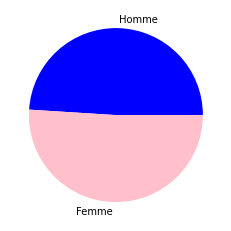

Il n'y a pas de sur-représentation d'un sexe par rapport à l'autre. Sur ce critère l'échantillon est homogène.


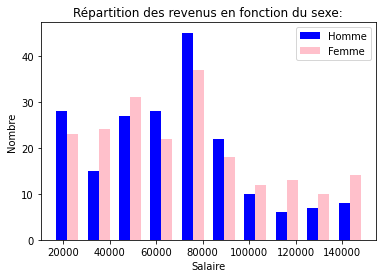

On ne constate pas de forte disparité.


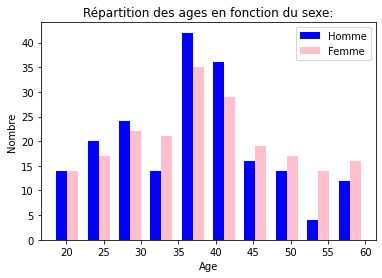

Ici aussi le jeux de données est homogène.


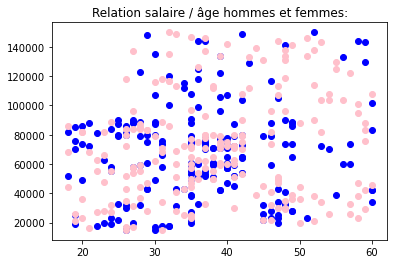

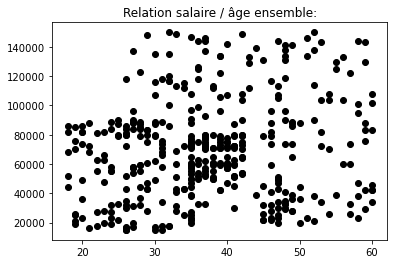

Aucune différences h/f constaté.


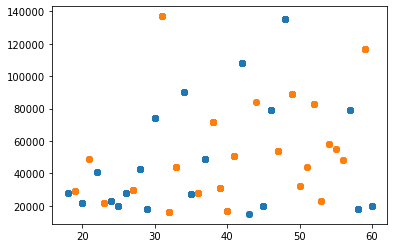

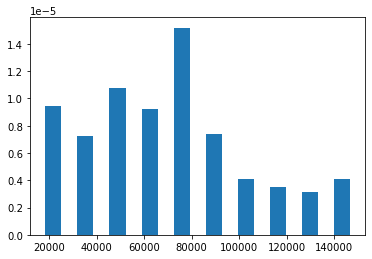

Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple
Il n'y a pas de différence significative entre le comportement des femmes et des hommes.


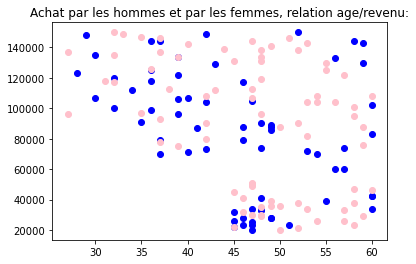

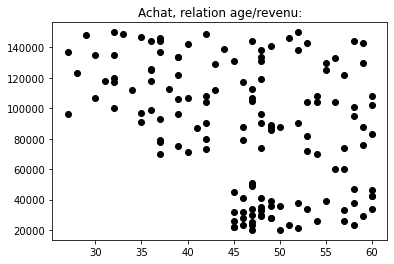

Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple
Il n'y a pas de différence significative entre le comportement des femmes et des hommes.


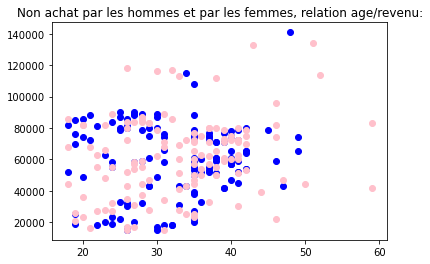

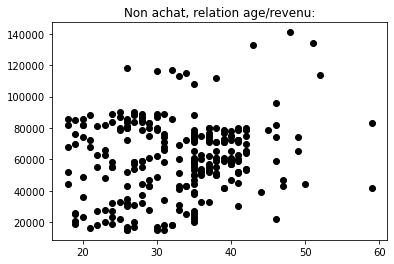

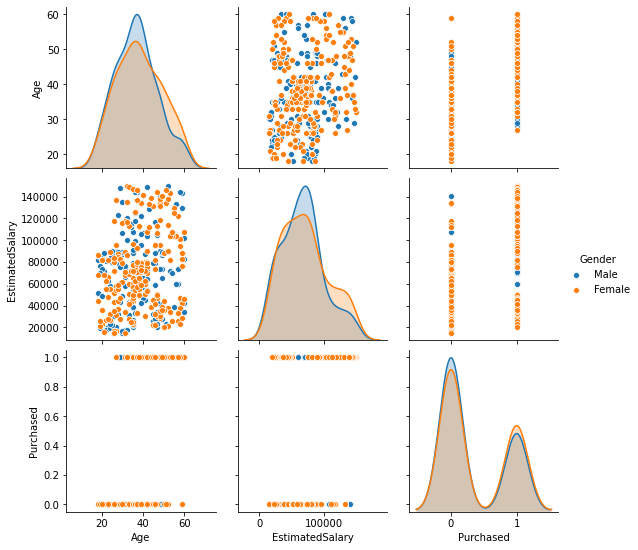

In [170]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn as  skl
from sklearn.linear_model import LinearRegression

pomdata=pd.read_csv("pompompidou.csv")

# Le champ gender doit-être convertie en données booléenne:
# Voir la exemple dans http://www.python-simple.com/python-pandas/modif-dataframes.php
# Il y a plusieurs façon d'y arriver, en voici 2:
#pomdata['Gender'] = pomdata['Gender'].replace({'Male':0, 'Female':1})
#pomdata['Gender'] = pomdata['Gender'].replace(['Male','Female'],[0,1])

del pomdata['User ID'] # La colonne 'User ID' ne sert à rien dans l'étude des données, on la supprime

# Étude de l'échantillon

print("Répartition Homme femme dans l'échatillon")
homme= pomdata[pomdata['Gender']=='Male'] # Crée un dataframme contenant les données concernant les hommes
femme= pomdata[pomdata['Gender']=='Female']

print(len(homme.index), len(femme.index))
ph=len(homme.index)/len(pomdata.index)
pf=len(femme.index)/len(pomdata.index)

plt.pie([ph,pf], labels = ['Homme', 'Femme'], colors= ['blue','pink'])
plt.show()
print("Il n'y a pas de sur-représentation d'un sexe par rapport à l'autre. Sur ce critère \
l'échantillon est homogène.")

plt.title("Répartition des revenus en fonction du sexe:")
res = plt.hist([homme['EstimatedSalary'],femme['EstimatedSalary']], rwidth = 0.7, \
               color= ['blue','pink'], label = ['Homme','Femme'])
plt.ylabel('Nombre')
plt.xlabel('Salaire')
plt.legend()
plt.show()
print("On ne constate pas de forte disparité.")

plt.title("Répartition des âges en fonction du sexe:")
plt.hist([homme['Age'],femme['Age']], rwidth = 0.7, color= ['blue','pink'], label = ['Homme','Femme'])
plt.ylabel('Nombre')
plt.xlabel('Age')
plt.legend()
plt.show()
print("Ici aussi le jeux de données est homogène.")

plt.title("Relation salaire / âge hommes et femmes:")
plt.scatter(homme['Age'], homme['EstimatedSalary'], c = 'blue')
plt.scatter(femme['Age'], femme['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Relation salaire / âge ensemble:")
plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'black')
plt.show()
print("Aucune différences h/f constaté.")



df= pd.DataFrame({'A': homme['EstimatedSalary'], 'B': femme['EstimatedSalary']},index = pomdata['Age'])
plt.plot(df,marker = 'o', linestyle = 'none')
plt.show()

plt.hist(pomdata['EstimatedSalary'],rwidth = 0.5, density= True)
plt.show()





# etude hom femm sur les achats
print("Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple")
print("Il n'y a pas de différence significative entre le comportement des femmes et des hommes.")
achatfem= femme[femme['Purchased']==True]
achathom= homme[homme['Purchased']==True]
achat= pomdata[pomdata['Purchased']==True]
plt.title("Achat par les hommes et par les femmes, relation âge/revenu:")
plt.scatter(achathom['Age'], achathom['EstimatedSalary'], c = 'blue')
plt.scatter(achatfem['Age'], achatfem['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Achat, relation âge/revenu:")
plt.scatter(achat['Age'], achat['EstimatedSalary'], c = 'black')
#plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'green')
plt.show()

# etude hom femm sur les achats
print("Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple")
print("Il n'y a pas de différence significative entre le comportement des femmes et des hommes.")
nonachatfem= femme[femme['Purchased']==False]
nonachathom= homme[homme['Purchased']==False]
nonachat= pomdata[pomdata['Purchased']==False]
plt.title("Non achat par les hommes et par les femmes, relation âge/revenu:")
plt.scatter(nonachathom['Age'], nonachathom['EstimatedSalary'], c = 'blue')
plt.scatter(nonachatfem['Age'], nonachatfem['EstimatedSalary'], c = 'pink')
plt.show()
plt.title("Non achat, relation âge/revenu:")
plt.scatter(nonachat['Age'], nonachat['EstimatedSalary'], c = 'black')
#plt.scatter(pomdata['Age'], pomdata['EstimatedSalary'], c = 'green')
plt.show()

# Je ne suis pas sur de comprendre l'intérêt de l'affichage de pairplot.... mais il est demandé :)
sns.pairplot(pomdata, hue='Gender')



### **Conclusion**  
L'échantillon est homogène sur:
* Représentation hommes / femmes.
* La répartition des revenus en fonction du sexe ne fait pas apparaître de déséquilibre.
* La répartition des âges en fonction est homogène.
* Il ne semble pas y avoir de différences majeurs entre le comportement des femmes et des hommes en ce qui concerne l'acte d'achat des apples. En première approximation, et pour symplifier les calculs, **le sexe ne sera pas pris en considération.**
* Mise en évidence d'une 'zonne blanche'. Les jeunes ayant de faibles revenus n'achète pas d'apple")
* 3 catégories apparaissent: Les **hauts revenus** achètent quelques soit leur âge, **Les "séniors"** achètent quelque soit leurs revenus et les **jeunes avec de faibles revenus** qui n'achètent pas. 

On notera une trés faible représentation des mâles de 55 ans! Ceci pourrait être dû a un comportement de type Mante religieuse chez les females du même âge, ou à une faiblesse structurelle du mâle de cet âge. Bien que cela sorte du cadre de l'étude, je devrais m'y interesser de prés!  

## **6. Résoudre le cas d’étude présenté ci-dessous avec la librairie Scikit-Learn.**

## **7. Résoudre le cas d’étude présenté ci-dessous avec votre propre classe python sans utiliser la librairie Scikit-Learn.**

## **8. Rendre accessible votre notebook via Github.**

## **9. Partager votre lien github comme rendu dans Simplonline. Le cas d'étude !!**
Imaginez que vous soyez gérant de magasin au magasin APPLE, augmenter de 10% le chiffre d'affaires est votre objectif ce mois-ci. Par conséquent, vous devez savoir qui sont les clients potentiels afin de maximiser le montant de la vente.
Les informations client dont vous disposez incluent le salaire estimé, le sexe, l'âge et le numéro client (Estimated Salary, Gender, Age, and Customer ID).